# Financial Analyzer

## Description and Instructions

Input any stock ticker from Yahoo Finance and receive a detailed quantitative and visual analysis. If you are a beginner, you can also copy and paste the output in ChatGPT to get a detailed explanation. Enjoy!

Note: this project is still in development, it will feature in the future a section dedicated to direction prediction and news sentiment analysis

## Input the Stock Ticker

In [ ]:
import yfinance as yf

def download_full_stock_data(ticker):
    """
    Download comprehensive stock data from Yahoo Finance including historical prices, dividends, splits,
    financial statements, and additional metadata.

    Parameters:
    ticker (str): The stock ticker symbol.

    Returns:
    dict: A dictionary containing a wide range of stock data.
    """
    # Initialize the Ticker object from yfinance
    stock = yf.Ticker(ticker)

    # Fetching all available data
    historical_data = stock.history(period="max")  # Get all historical data
    dividends = stock.dividends  # Get dividend data
    splits = stock.splits  # Get stock split data
    info = stock.info  # Get a dictionary of many details on the stock
    financials = stock.financials  # Get annual financials
    quarterly_financials = stock.quarterly_financials  # Get quarterly financials
    balance_sheet = stock.balance_sheet  # Get annual balance sheet
    quarterly_balance_sheet = stock.quarterly_balance_sheet  # Get quarterly balance sheet
    cash_flow = stock.cashflow  # Get annual cash flow data
    quarterly_cash_flow = stock.quarterly_cashflow  # Get quarterly cash flow data
    recommendations = stock.recommendations  # Get analyst recommendations

    # Combining everything into a dictionary
    data = {
        "Historical Prices": historical_data,
        "Dividends": dividends,
        "Splits": splits,
        "Info": info,
        "Financials": financials,
        "Quarterly Financials": quarterly_financials,
        "Balance Sheet": balance_sheet,
        "Quarterly Balance Sheet": quarterly_balance_sheet,
        "Cash Flow": cash_flow,
        "Quarterly Cash Flow": quarterly_cash_flow,
        "Analyst Recommendations": recommendations
    }

    return data

def retrieval():
    ticker = input("Enter the stock ticker: ")
    full_data = download_full_stock_data(ticker)
    return full_data

# Run the main function
data = retrieval()


Enter the stock ticker: GOOGL


## Quantitative Analysis

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=85ec11dc51730e3a085bc3455d64546ca98f9cbea4a5be7411a3a0668afefcdd
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_ta as ta


# All functions for Quantitative Analys
# Define the functions for descriptive statistics and time series analysis
def descriptive_statistics(data):
    desc_stats = {
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode().values[0],
        'std_dev': data.std(),
        'variance': data.var(),
        'skewness': skew(data, nan_policy='omit'),
        'kurtosis': kurtosis(data, nan_policy='omit')
    }
    return desc_stats

def moving_averages(data, window=20):
    return data.rolling(window=window).mean()

def bollinger_bands(data, window=20):
    ma = moving_averages(data, window)
    std_dev = data.rolling(window=window).std()
    upper_band = ma + (2 * std_dev)
    lower_band = ma - (2 * std_dev)
    return upper_band, lower_band

def autocorrelation_analysis(data):
    autocorr = acf(data.dropna())
    return autocorr

def time_series_decomposition(data, model='additive', period=252):
    decomposition = seasonal_decompose(data, model=model, period=period)
    return decomposition

def compute_returns(data, period='D'):
    if period == 'D':
        returns = data.pct_change(1)  # Daily returns
    elif period == 'W':
        returns = data.pct_change(5)  # Weekly returns, assuming 5 trading days
    elif period == 'M':
        returns = data.pct_change(21)  # Monthly returns, assuming 21 trading days
    return returns

def calculate_cagr(data, years=1):
    start_value = data.iloc[0]
    end_value = data.iloc[-1]
    cagr = (end_value / start_value) ** (1/years) - 1
    return cagr

def calculate_volatility(returns):
    return returns.std() * np.sqrt(252)  # annualized volatility

def sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns - risk_free_rate / 252
    return excess_returns.mean() / returns.std() * np.sqrt(252)

def sortino_ratio(returns, risk_free_rate=0.01):
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    excess_returns = returns - risk_free_rate / 252
    return excess_returns.mean() / downside_std * np.sqrt(252)

def compute_rsi(data, window=14):
    return ta.rsi(data, length=window)

def compute_macd(data):
    macd = ta.macd(data)
    return macd['MACD_12_26_9'], macd['MACDh_12_26_9'], macd['MACDs_12_26_9']

def compute_stochastic_oscillator(high, low, close):
    stoch = ta.stoch(high, low, close)
    return stoch['STOCHk_14_3_3'], stoch['STOCHd_14_3_3']

def compute_atr(high, low, close, window=14):
    return ta.atr(high, low, close, length=window)

def compute_parabolic_sar(high, low):
    return ta.psar(high, low)

def compute_ichimoku_cloud(high, low, close):
    ichimoku = ta.ichimoku(high, low, close)
    # Check if ichimoku is a DataFrame
    if isinstance(ichimoku, pd.DataFrame):
        tenkan_sen = ichimoku['ISA_9'] if 'ISA_9' in ichimoku else pd.Series()
        kijun_sen = ichimoku['ISB_26'] if 'ISB_26' in ichimoku else pd.Series()
        senkou_span_a = ichimoku['ITS_9'] if 'ITS_9' in ichimoku else pd.Series()
        senkou_span_b = ichimoku['IKS_26'] if 'IKS_26' in ichimoku else pd.Series()
        chikou_span = ichimoku['ICS_26'] if 'ICS_26' in ichimoku else pd.Series()
    else:
        # Handle the case where ichimoku is a tuple of DataFrames
        tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span = pd.Series(), pd.Series(), pd.Series(), pd.Series(), pd.Series()
        if len(ichimoku) > 0: tenkan_sen = ichimoku[0]
        if len(ichimoku) > 1: kijun_sen = ichimoku[1]
        if len(ichimoku) > 2: senkou_span_a = ichimoku[2]
        if len(ichimoku) > 3: senkou_span_b = ichimoku[3]
        if len(ichimoku) > 4: chikou_span = ichimoku[4]

    return tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span


def fetch_benchmark_data(stock_dates):
    # Fetch benchmark data for the same dates
    benchmark_data = yf.download('^GSPC', start=stock_dates.min(), end=stock_dates.max())
    # Ensure the datetime index is naive (no timezone information)
    benchmark_data.index = benchmark_data.index.tz_localize(None)
    return benchmark_data['Close'].pct_change()

def beta(stock_returns, benchmark_returns):
    # Align returns by index to ensure they are comparable
    benchmark_returns = benchmark_returns.reindex(stock_returns.index, method='pad')
    # Calculate covariance and beta
    covariance_matrix = np.cov(stock_returns.dropna(), benchmark_returns.dropna())
    beta_value = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta_value

def value_at_risk(returns, confidence_level=0.05):
    """
    Calculate the VaR at a specified confidence level
    """
    if isinstance(returns, pd.Series):
        returns = returns.dropna()
    return -np.percentile(returns, confidence_level * 100)

def conditional_value_at_risk(returns, confidence_level=0.05):
    """
    Calculate CVaR at a specified confidence level
    """
    if isinstance(returns, pd.Series):
        returns = returns.dropna()
    var = value_at_risk(returns, confidence_level)
    return -returns[returns <= -var].mean()

def max_drawdown(return_series):
    """
    Calculate the maximum drawdown in the returns series
    """
    cumulative_returns = (1 + return_series).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    return drawdown.min()

def calculate_r_squared(stock_returns, benchmark_returns):
    correlation_matrix = np.corrcoef(stock_returns, benchmark_returns)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

def treynor_ratio(returns, risk_free_rate, beta):
    excess_returns = returns - risk_free_rate / 252
    return excess_returns.mean() / beta

def jensens_alpha(returns, benchmark_returns, risk_free_rate, beta):
    excess_returns = returns - risk_free_rate / 252
    benchmark_excess_returns = benchmark_returns - risk_free_rate / 252
    alpha = excess_returns.mean() - beta * benchmark_excess_returns.mean()
    return alpha

def tracking_error(returns, benchmark_returns):
    return np.sqrt(np.mean((returns - benchmark_returns) ** 2)) * np.sqrt(252)


def fundamental_analysis(info, financials, balance_sheet):
    """
    Extract and compute key fundamental ratios from the info dictionary and financial statements data.
    """
    # Current values from the info dictionary
    p_e_ratio = info.get('trailingPE', np.nan)
    p_b_ratio = info.get('priceToBook', np.nan)
    eps = info.get('trailingEps', np.nan)
    dividend_yield = info.get('dividendYield', np.nan) * 100  # converting to percentage
    roe = info.get('returnOnEquity', np.nan)
    roa = info.get('returnOnAssets', np.nan)
    debt_to_equity = info.get('debtToEquity', np.nan)
    interest_coverage = info.get('interestCoverage', np.nan)
    fcf = info.get('freeCashflow', np.nan)

    # Extract the most recent data instead of 'TTM'
    recent_period = financials.columns[0]
    recent_balance_period = balance_sheet.columns[0]

    dividend_payout_ratio = info.get('dividendRate', np.nan) / eps if eps else np.nan
    gross_profit_margin = financials.loc['Gross Profit', recent_period] / financials.loc['Total Revenue', recent_period] if 'Gross Profit' in financials.index and 'Total Revenue' in financials.index else np.nan
    operating_margin = financials.loc['Operating Income', recent_period] / financials.loc['Total Revenue', recent_period] if 'Operating Income' in financials.index and 'Total Revenue' in financials.index else np.nan
    quick_ratio = (balance_sheet.loc['Current Assets', recent_balance_period] - balance_sheet.loc['Inventory', recent_balance_period]) / balance_sheet.loc['Current Liabilities', recent_balance_period] if 'Inventory' in balance_sheet.index else balance_sheet.loc['Current Assets', recent_balance_period] / balance_sheet.loc['Current Liabilities', recent_balance_period]
    current_ratio = balance_sheet.loc['Current Assets', recent_balance_period] / balance_sheet.loc['Current Liabilities', recent_balance_period]
    ebitda = financials.loc['EBITDA', recent_period] if 'EBITDA' in financials.index else np.nan

    fundamental_data = {
        "P/E Ratio": p_e_ratio,
        "P/B Ratio": p_b_ratio,
        "EPS": eps,
        "Dividend Yield": dividend_yield,
        "ROE": roe,
        "ROA": roa,
        "Debt to Equity": debt_to_equity,
        "Interest Coverage": interest_coverage,
        "FCF": fcf,
        "EVA": np.nan,  # EVA requires NOPAT and WACC, which aren't directly available from yfinance
        "DuPont Analysis": np.nan,  # DuPont analysis requires separate calculation from several financial statements components
        "Dividend Payout Ratio": dividend_payout_ratio,
        "Gross Profit Margin": gross_profit_margin,
        "Operating Margin": operating_margin,
        "Quick Ratio": quick_ratio,
        "Current Ratio": current_ratio,
        "EBITDA": ebitda
    }
    return fundamental_data


In [ ]:
def quantitative(full_data):
    close_prices = full_data["Historical Prices"]['Close']
    high_prices = full_data["Historical Prices"]['High']
    low_prices = full_data["Historical Prices"]['Low']
    daily_returns = compute_returns(close_prices)

    # Ensure the datetime index is naive (no timezone information)
    daily_returns.index = daily_returns.index.tz_localize(None)

    # Align and fetch benchmark data
    benchmark_returns = fetch_benchmark_data(daily_returns.index)
    stock_beta = beta(daily_returns, benchmark_returns)

    # Descriptive statistics
    desc_stats = descriptive_statistics(close_prices)

    # Moving averages and Bollinger Bands
    ma = moving_averages(close_prices)
    upper_band, lower_band = bollinger_bands(close_prices)

    # Autocorrelation and Time Series Decomposition
    autocorr = autocorrelation_analysis(close_prices)
    decomposition = time_series_decomposition(close_prices.fillna(method='bfill'))

    # Returns analysis
    weekly_returns = compute_returns(close_prices, 'W')
    monthly_returns = compute_returns(close_prices, 'M')
    cagr = calculate_cagr(close_prices)
    volatility = calculate_volatility(daily_returns)
    sharpe = sharpe_ratio(daily_returns)
    sortino = sortino_ratio(daily_returns)

    # Risk metrics
    stock_var = value_at_risk(daily_returns)
    stock_cvar = conditional_value_at_risk(daily_returns)
    stock_max_drawdown = max_drawdown(daily_returns)
    stock_r_squared = calculate_r_squared(daily_returns.dropna(), benchmark_returns)

    # Fundamental analysis
    fundamentals = fundamental_analysis(full_data['Info'], full_data['Financials'], full_data['Balance Sheet'])

    # Technical indicators using pandas_ta
    rsi = compute_rsi(close_prices)
    macd, macd_signal, macd_hist = compute_macd(close_prices)
    stochastic_k, stochastic_d = compute_stochastic_oscillator(high_prices, low_prices, close_prices)
    atr = compute_atr(high_prices, low_prices, close_prices)
    parabolic_sar = compute_parabolic_sar(high_prices, low_prices)
    ichimoku_tenkan, ichimoku_kijun, ichimoku_span_a, ichimoku_span_b, ichimoku_chikou = compute_ichimoku_cloud(high_prices, low_prices, close_prices)

    # Additional risk metrics
    treynor = treynor_ratio(daily_returns, risk_free_rate=0.01, beta=stock_beta)
    jensen_alpha = jensens_alpha(daily_returns, benchmark_returns, risk_free_rate=0.01, beta=stock_beta)
    tracking_err = tracking_error(daily_returns, benchmark_returns)

    # Collect all analysis results into a dictionary for output
    results = {
        "Descriptive Statistics": desc_stats,
        "Moving Averages": ma.tail(),
        "Bollinger Bands": {"Upper Band": upper_band.tail(), "Lower Band": lower_band.tail()},
        "Autocorrelation": autocorr,
        "Time Series Decomposition": {
            "Trend": decomposition.trend.tail(),
            "Seasonal": decomposition.seasonal.tail(),
            "Residual": decomposition.resid.tail()
        },
        "Daily Returns": daily_returns.tail(),
        "Weekly Returns": weekly_returns.tail(),
        "Monthly Returns": monthly_returns.tail(),
        "CAGR": cagr,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Beta": stock_beta,
        "VaR": stock_var,
        "CVaR": stock_cvar,
        "Max Drawdown": stock_max_drawdown,
        "R-squared": stock_r_squared,
        "Fundamental Analysis": fundamentals,
        "RSI": rsi.tail(),
        "MACD": {
            "MACD": macd.tail(),
            "Signal Line": macd_signal.tail(),
            "MACD Histogram": macd_hist.tail()
        },
        "Stochastic Oscillator": {"K": stochastic_k.tail(), "D": stochastic_d.tail()},
        "ATR": atr.tail(),
        "Parabolic SAR": parabolic_sar.tail(),
        "Ichimoku Cloud": {
            "Tenkan-sen": ichimoku_tenkan.tail(),
            "Kijun-sen": ichimoku_kijun.tail(),
            "Senkou Span A": ichimoku_span_a.tail(),
            "Senkou Span B": ichimoku_span_b.tail(),
            "Chikou Span": ichimoku_chikou.tail()
        },
        "Treynor Ratio": treynor,
        "Jensen’s Alpha": jensen_alpha,
        "Tracking Error": tracking_err
    }

    return results


quantitative_analysis = quantitative(data)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Displaying the results
for key, value in quantitative_analysis.items():
    print(f"{key}:")
    print(value)
    print("\n")

Descriptive Statistics:
{'mean': 44.2652856342478, 'median': 27.441999435424805, 'mode': 14.514514923095703, 'std_dev': 41.47112102515, 'variance': 1719.8538790826383, 'skewness': 1.2316022965829998, 'kurtosis': 0.39711940195350515}


Moving Averages:
Date
2024-05-28 00:00:00-04:00    171.3080
2024-05-29 00:00:00-04:00    171.9640
2024-05-30 00:00:00-04:00    172.3765
2024-05-31 00:00:00-04:00    172.6705
2024-06-03 00:00:00-04:00    172.9310
Name: Close, dtype: float64


Bollinger Bands:
{'Upper Band': Date
2024-05-28 00:00:00-04:00    180.158346
2024-05-29 00:00:00-04:00    180.066161
2024-05-30 00:00:00-04:00    179.525400
2024-05-31 00:00:00-04:00    179.286372
2024-06-03 00:00:00-04:00    179.037209
Name: Close, dtype: float64, 'Lower Band': Date
2024-05-28 00:00:00-04:00    162.457655
2024-05-29 00:00:00-04:00    163.861839
2024-05-30 00:00:00-04:00    165.227600
2024-05-31 00:00:00-04:00    166.054628
2024-06-03 00:00:00-04:00    166.824790
Name: Close, dtype: float64}


Autocor

## Visual Analysis

<ipython-input-78-250e5d3f4647>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(daily_returns, shade=True)


NameError: name 'rsi' is not defined

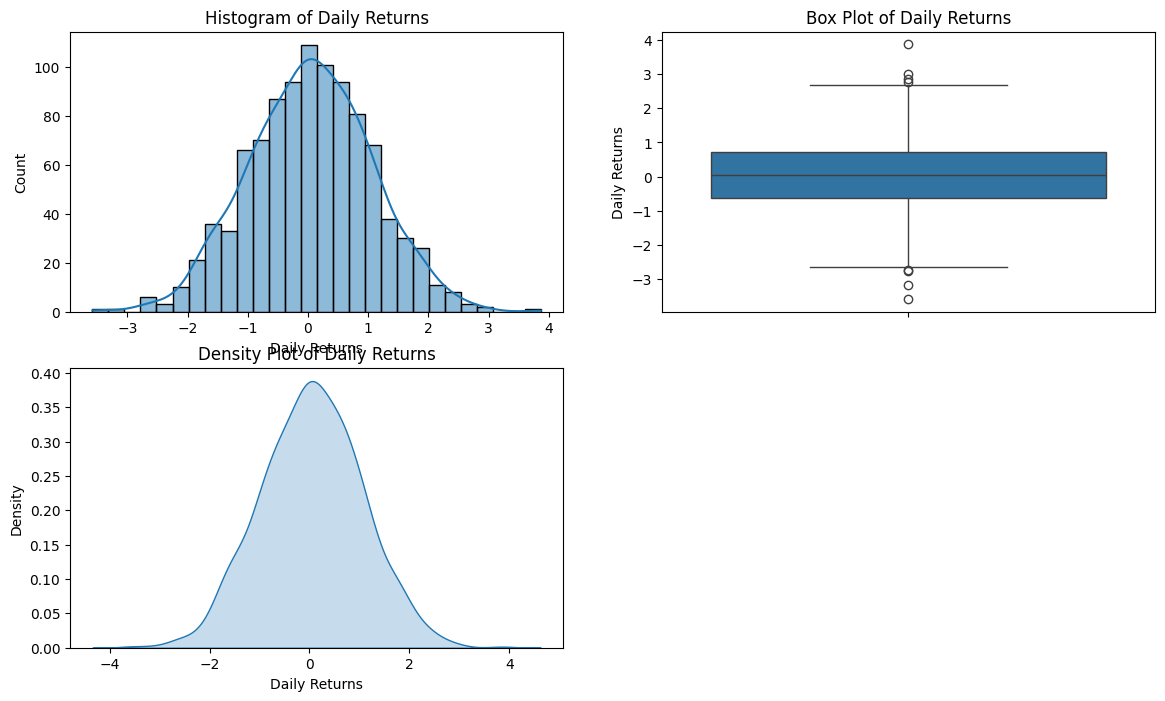

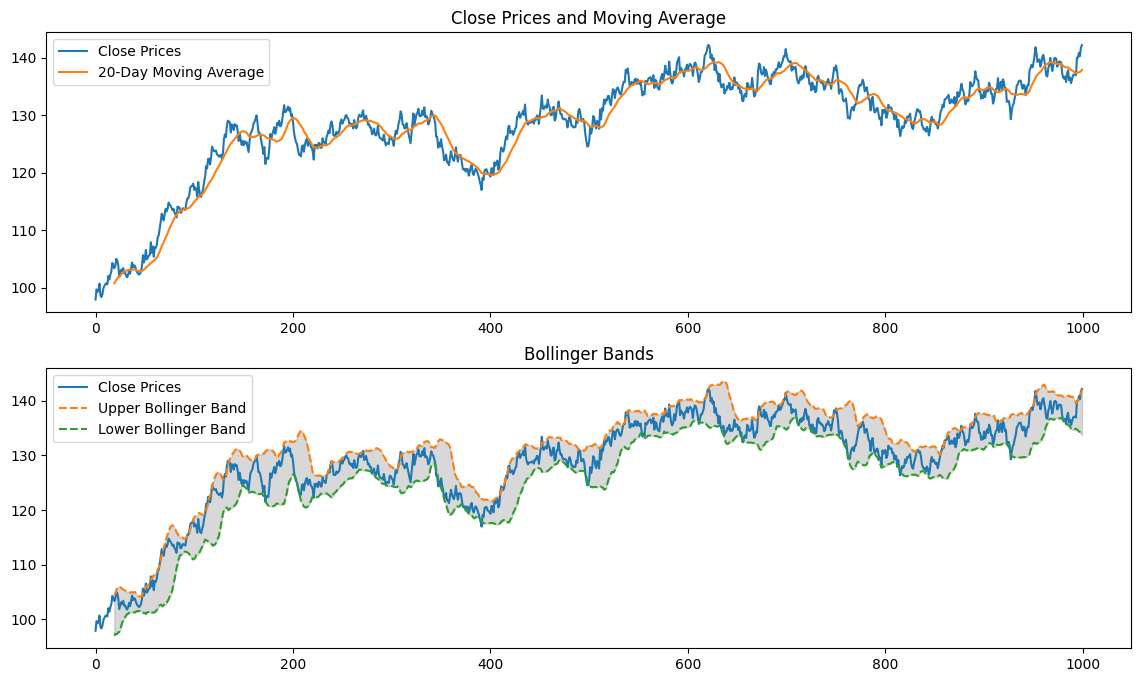

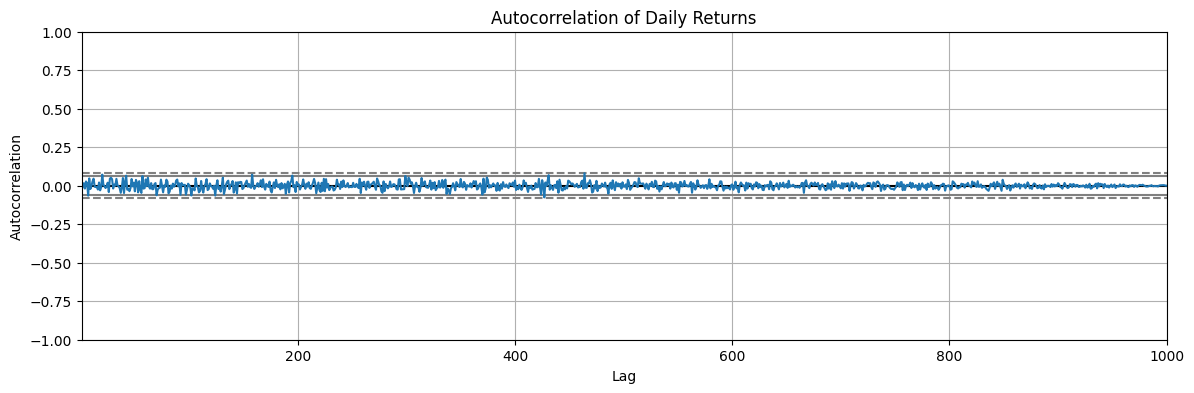

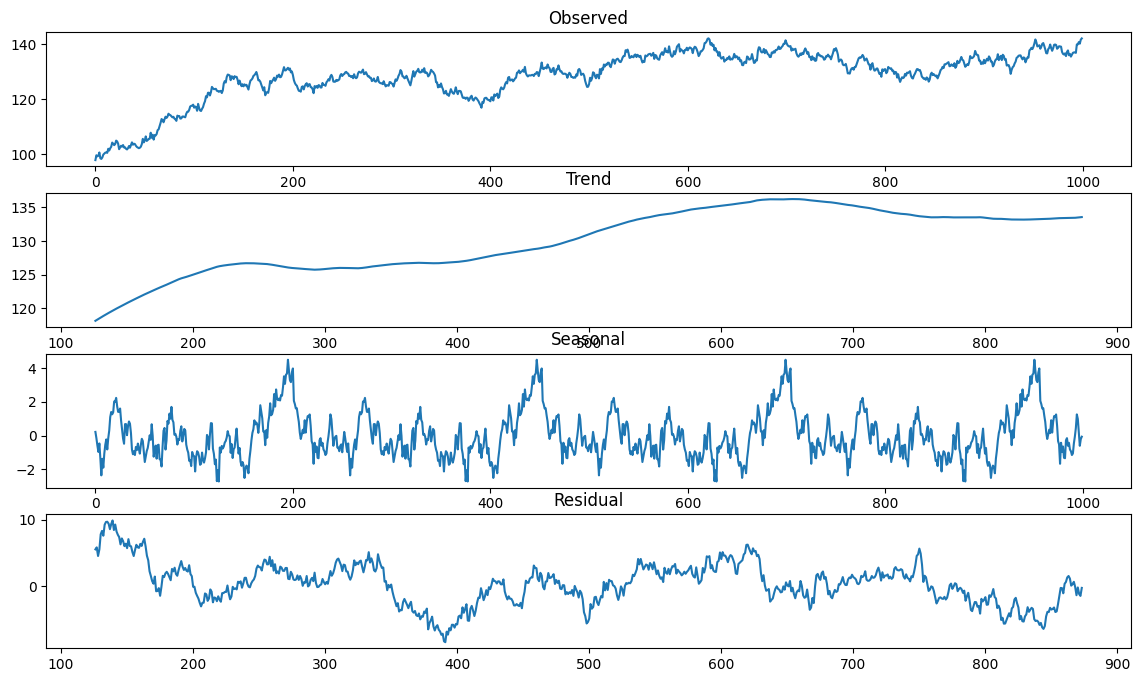

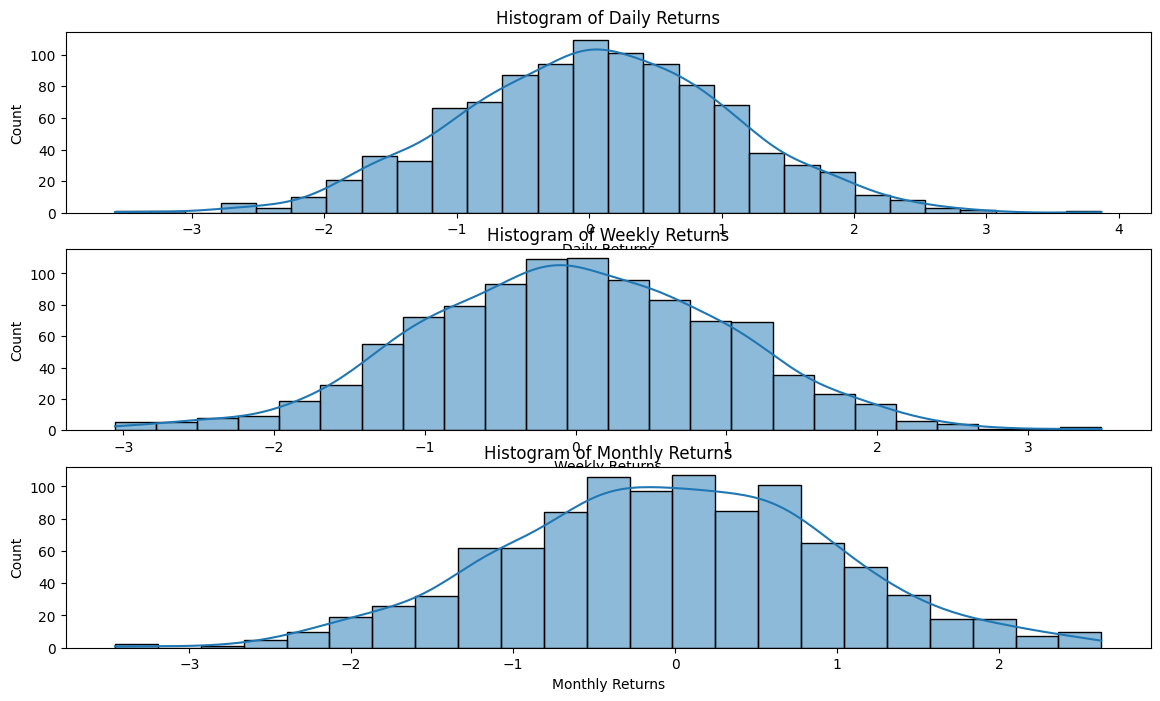

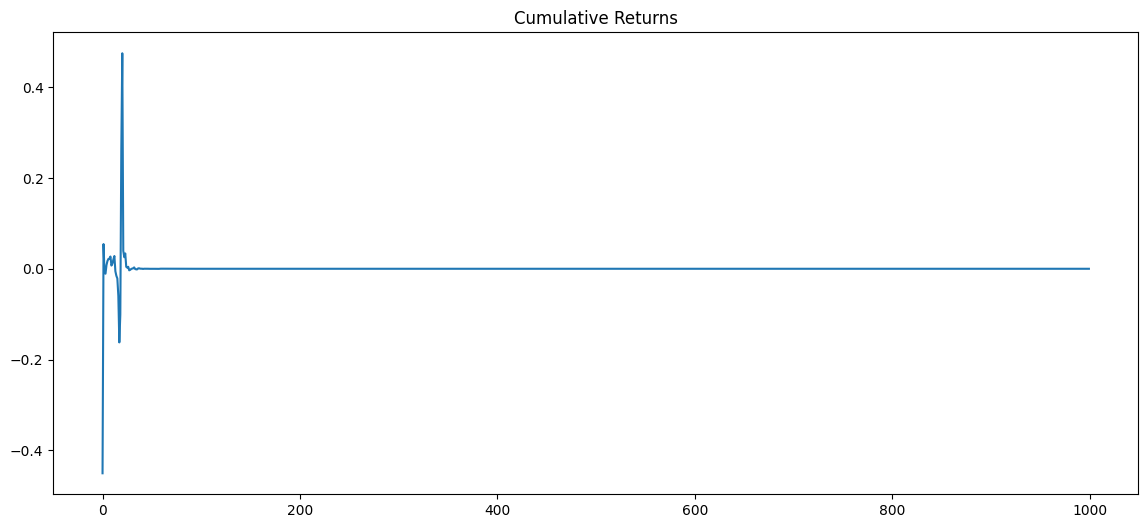

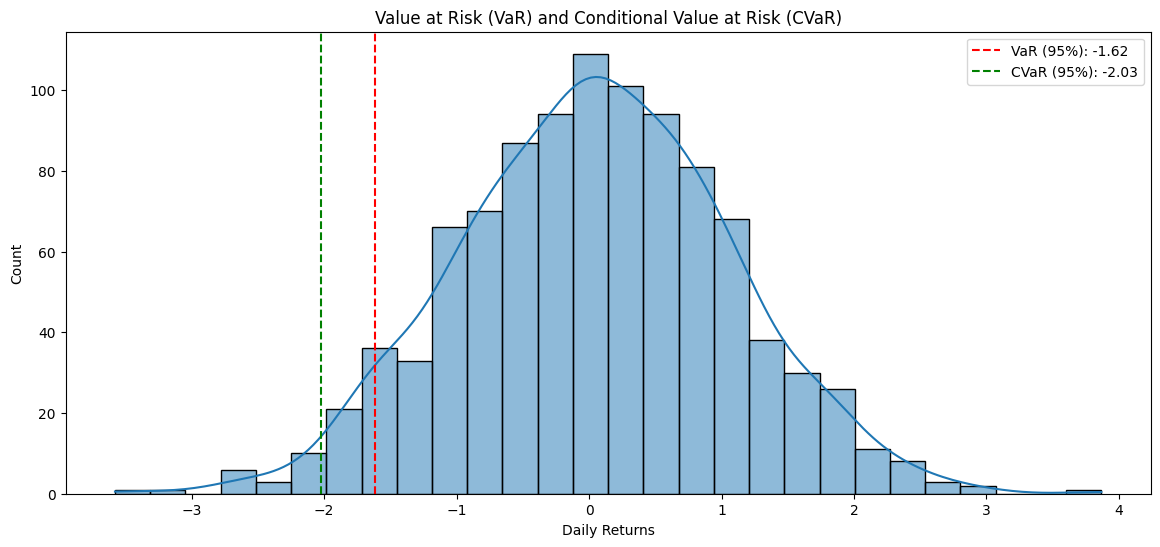

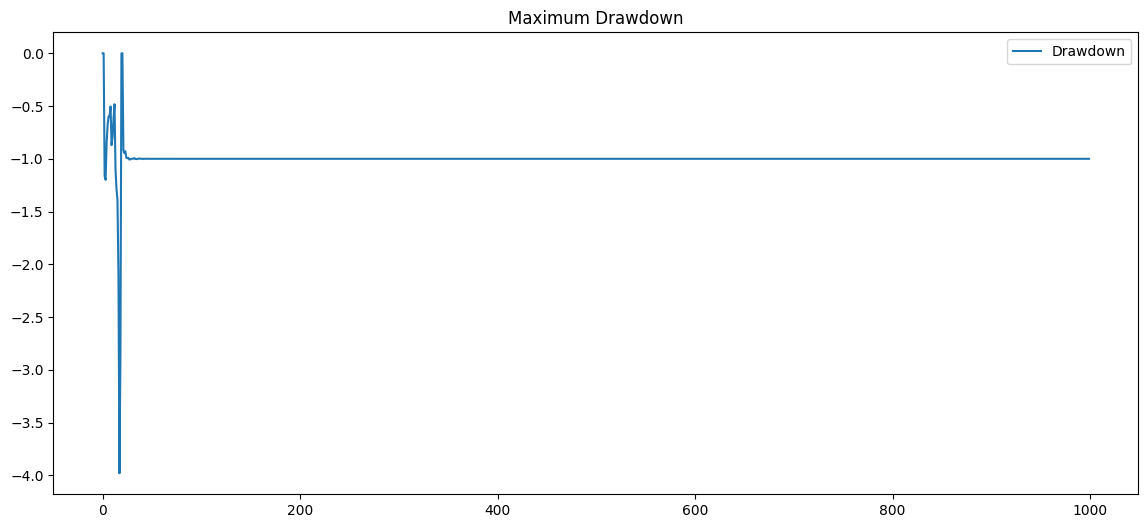

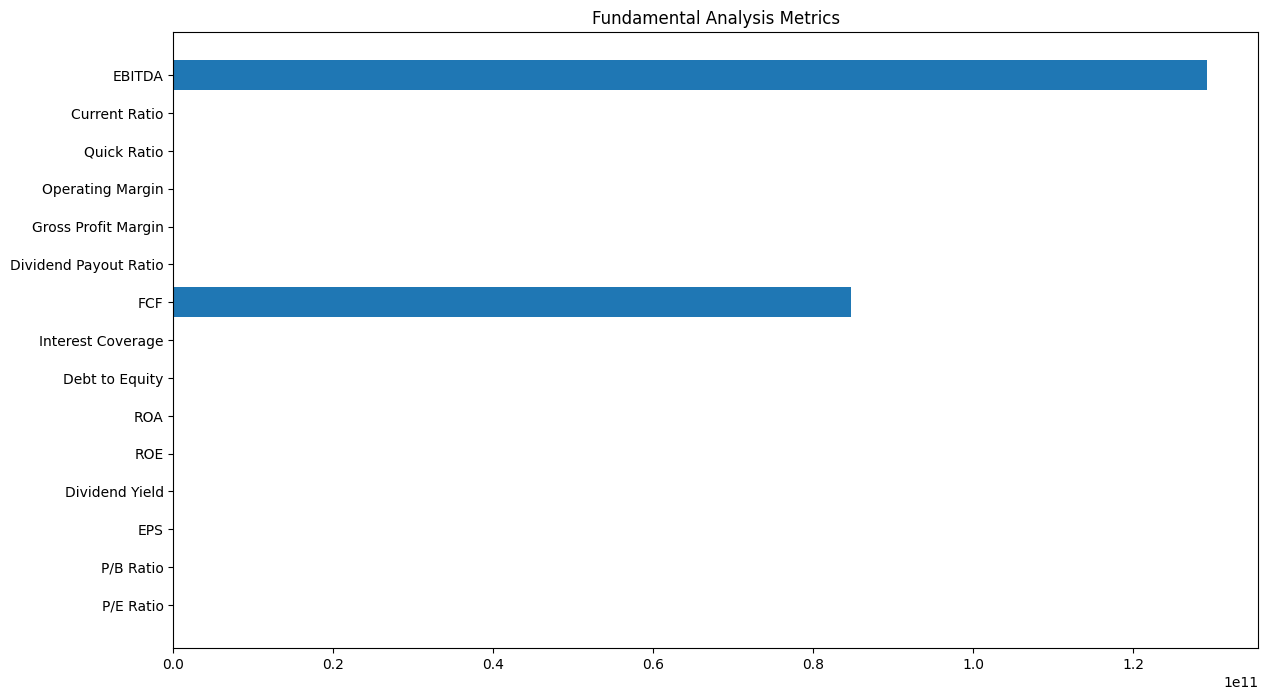

<Figure size 1400x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure your data is in the proper format
close_prices = data['Close']
high_prices = data['High']
low_prices = data['Low']
daily_returns = data['Daily Returns']
weekly_returns = data['Weekly Returns']
monthly_returns = data['Monthly Returns']

# Descriptive Statistics
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(daily_returns, kde=True)
plt.title('Histogram of Daily Returns')

plt.subplot(2, 2, 2)
sns.boxplot(daily_returns)
plt.title('Box Plot of Daily Returns')

plt.subplot(2, 2, 3)
sns.kdeplot(daily_returns, shade=True)
plt.title('Density Plot of Daily Returns')

# Time Series Analysis
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(close_prices, label='Close Prices')
plt.plot(close_prices.rolling(window=20).mean(), label='20-Day Moving Average')
plt.title('Close Prices and Moving Average')
plt.legend()

plt.subplot(2, 1, 2)
ma = close_prices.rolling(window=20).mean()
std_dev = close_prices.rolling(window=20).std()
upper_band = ma + (2 * std_dev)
lower_band = ma - (2 * std_dev)
plt.plot(close_prices, label='Close Prices')
plt.plot(upper_band, label='Upper Bollinger Band', linestyle='--')
plt.plot(lower_band, label='Lower Bollinger Band', linestyle='--')
plt.fill_between(close_prices.index, lower_band, upper_band, color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.legend()

# Autocorrelation plot
plt.figure(figsize=(14, 4))
pd.plotting.autocorrelation_plot(daily_returns)
plt.title('Autocorrelation of Daily Returns')

# Time Series Decomposition (Assuming a seasonal decomposition)
decomposition = seasonal_decompose(close_prices, model='additive', period=252)
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual')

# Returns Analysis
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
sns.histplot(daily_returns, kde=True)
plt.title('Histogram of Daily Returns')

plt.subplot(3, 1, 2)
sns.histplot(weekly_returns, kde=True)
plt.title('Histogram of Weekly Returns')

plt.subplot(3, 1, 3)
sns.histplot(monthly_returns, kde=True)
plt.title('Histogram of Monthly Returns')

# Cumulative returns plot
cumulative_returns = (1 + daily_returns).cumprod()
plt.figure(figsize=(14, 6))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns')

# Risk Metrics: VaR and CVaR
VaR_95 = np.percentile(daily_returns, 5)
CVaR_95 = daily_returns[daily_returns <= VaR_95].mean()
plt.figure(figsize=(14, 6))
sns.histplot(daily_returns, kde=True)
plt.axvline(VaR_95, color='r', linestyle='--', label=f'VaR (95%): {VaR_95:.2f}')
plt.axvline(CVaR_95, color='g', linestyle='--', label=f'CVaR (95%): {CVaR_95:.2f}')
plt.title('Value at Risk (VaR) and Conditional Value at Risk (CVaR)')
plt.legend()

# Maximum Drawdown plot
cumulative_returns = (1 + daily_returns).cumprod()
running_max = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_returns - running_max) / running_max
plt.figure(figsize=(14, 6))
plt.plot(drawdown, label='Drawdown')
plt.title('Maximum Drawdown')
plt.legend()

# Fundamental Analysis Bar Plots
fundamental_data = {
    "P/E Ratio": 30.228,
    "P/B Ratio": 40.120,
    "EPS": 6.42,
    "Dividend Yield": 0.52,
    "ROE": 1.473,
    "ROA": 0.221,
    "Debt to Equity": 140.968,
    "Interest Coverage": np.nan,
    "FCF": 84726874112,
    "Dividend Payout Ratio": 0.156,
    "Gross Profit Margin": 0.441,
    "Operating Margin": 0.298,
    "Quick Ratio": 0.944,
    "Current Ratio": 0.988,
    "EBITDA": 129188000000.0
}

plt.figure(figsize=(14, 8))
plt.barh(list(fundamental_data.keys()), list(fundamental_data.values()))
plt.title('Fundamental Analysis Metrics')

# Technical Indicators
# RSI
plt.figure(figsize=(14, 4))
plt.plot(rsi)
plt.title('Relative Strength Index (RSI)')

# MACD
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(macd, label='MACD')
plt.plot(macd_signal, label='Signal Line')
plt.title('MACD')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(macd_hist, label='MACD Histogram')
plt.title('MACD Histogram')
plt.legend()

# Stochastic Oscillator
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(stochastic_k, label='%K')
plt.title('Stochastic Oscillator %K')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stochastic_d, label='%D')
plt.title('Stochastic Oscillator %D')
plt.legend()

# ATR
plt.figure(figsize=(14, 6))
plt.plot(atr)
plt.title('Average True Range (ATR)')

# Parabolic SAR
plt.figure(figsize=(14, 6))
plt.plot(close_prices, label='Close Prices')
plt.plot(parabolic_sar['PSARl_0.02_0.2'], label='Parabolic SAR', linestyle='--')
plt.title('Parabolic SAR')
plt.legend()

# Ichimoku Cloud
plt.figure(figsize=(14, 8))
plt.plot(close_prices, label='Close Prices')
plt.plot(tenkan_sen, label='Tenkan-sen (Conversion Line)')
plt.plot(kijun_sen, label='Kijun-sen (Base Line)')
plt.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, color='grey', alpha=0.3, label='Kumo (Cloud)')
plt.title('Ichimoku Cloud')
plt.legend()

plt.tight_layout()
plt.show()


## Predictions